In [1]:
%pylab inline
import pandas as pd
import numpy as np
TodasEstaciones = pd.read_csv('Est1_Est2_Est3.csv',index_col=0,parse_dates=True)
TodasEstaciones.head()

Populating the interactive namespace from numpy and matplotlib


,Est1,Est2,Est3
Fecha,,,
2014-07-25,0.0,NaN,0.0
2014-07-26,0.6,NaN,0.0
2014-07-27,0.0,NaN,0.0
2014-07-28,0.0,NaN,0.0
2014-07-29,0.2,NaN,0.2


(array([16375, 16405, 16436, 16467, 16495, 16525], dtype=int64),
 <a list of 6 Text xticklabel objects>)

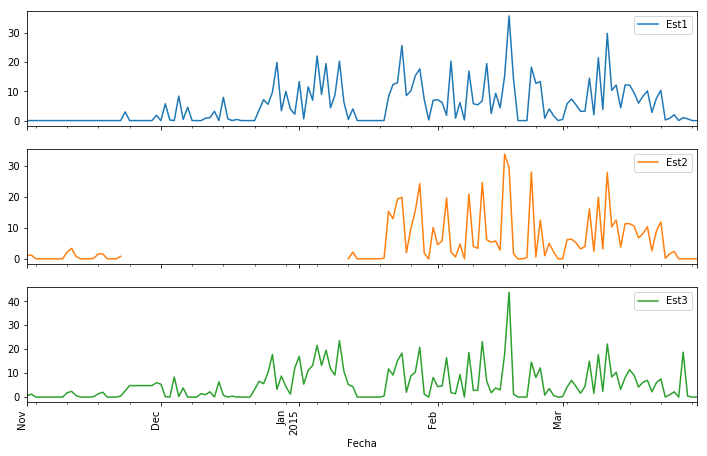

In [2]:
TodasEstaciones.loc['2014-11-01':'2015-03-31'].plot(subplots=True, figsize=(12, 8)); plt.legend(loc='best')
xticks(rotation='vertical')

In [3]:
import datetime
#we create a date column to extract the week number
TodasEstaciones['date']=TodasEstaciones.index
#apply a lambda function to the whole panda dataframe column
TodasEstaciones['week'] = TodasEstaciones['date'].apply(lambda x: x.isocalendar()[1])
#drop the date column because we dont need it
del TodasEstaciones['date']
#let see our dataframe
TodasEstaciones.head()

,Est1,Est2,Est3,week
Fecha,,,,
2014-07-25,0.0,NaN,0.0,30
2014-07-26,0.6,NaN,0.0,30
2014-07-27,0.0,NaN,0.0,30
2014-07-28,0.0,NaN,0.0,31
2014-07-29,0.2,NaN,0.2,31


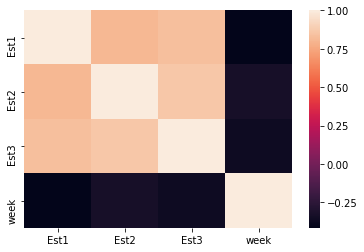

In [4]:
#creation of a correlation plot with seaborn
import seaborn as sns
corr = TodasEstaciones.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [5]:
#Definition of training sets
X_train = TodasEstaciones.loc['2015-01-20':'2015-03-27',['Est1','Est3','week']].astype(float32).values#,'week']] # Est 1, 3 and #week
y_train = TodasEstaciones.loc['2015-01-20':'2015-03-27','Est2'].astype(float32).values # Est 2

In [6]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

In [7]:
X_train[:20]

array([[-1.1105729 , -0.8753985 , -1.5966358 ],
       [-0.02605683,  0.60715   , -1.5966358 ],
       [ 0.529427  ,  0.2690249 , -1.5966358 ],
       [ 0.6087819 ,  1.0493137 , -1.5966358 ],
       [ 2.301685  ,  1.4654676 , -1.5966358 ],
       [ 0.02684647, -0.6673215 , -1.5966358 ],
       [ 0.2384593 ,  0.21700568, -1.2364519 ],
       [ 0.9262012 ,  0.42508262, -1.2364519 ],
       [ 1.2436206 ,  1.777583  , -1.2364519 ],
       [-0.1583149 , -0.77136   , -1.2364519 ],
       [-1.0841213 , -0.92741776, -1.2364519 ],
       [-0.18476649,  0.13897677, -1.2364519 ],
       [-0.1583149 , -0.355206  , -1.2364519 ],
       [-0.29057297, -0.32919642, -0.8762681 ],
       [-0.87250847,  1.2053713 , -0.8762681 ],
       [ 1.5874916 , -0.6933311 , -0.8762681 ],
       [-1.0047665 , -0.74535036, -0.8762681 ],
       [-0.29057297,  0.2950345 , -0.8762681 ],
       [-1.0841213 , -0.92741776, -0.8762681 ],
       [ 1.1378143 ,  1.4914773 , -0.8762681 ]], dtype=float32)

In [8]:
from keras.models import Sequential

from keras.layers import Dense

model = Sequential()

model.add(Dense(12, activation='linear', input_shape=(3,)))
model.add(Dense(8, activation='linear'))
model.add(Dense(1, activation='linear'))
model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                48        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=200,verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
67/67 [==============================] - 0s 3ms/step - loss: 159.7350 - acc: 0.0448
Epoch 2/200
67/67 [==============================] - 0s 81us/step - loss: 158.2273 - acc: 0.0448
Epoch 3/200
67/67 [==============================] - 0s 74us/step - loss: 156.7722 - acc: 0.0448
Epoch 4/200
67/67 [==============================] - 0s 148us/step - loss: 155.2102 - acc: 0.0448
Epoch 5/200
67/67 [==============================] - 0s 88us/step - loss: 153.8672 - acc: 0.0448
Epoch 6/200
67/67 [==============================] - 0s 89us/step - loss: 152.6439 - acc: 0.0448
Epoch 7/200
67/67 [==============================] - 0s 59us/step - loss: 151.2845 - acc: 0.0448
Epoch 8/200
67/67 [==============================] - 0s 59us/step - loss: 149.8079 - acc: 0.0448
Epoch 9/200
67/67 [==============================] - 0s 81us/step - loss: 148.4536 - acc: 0.0448
Epoch 10/200
67/67 [==============================] - 0s 96us/step - loss: 147.

67/67 [==============================] - 0s 118us/step - loss: 40.7533 - acc: 0.0000e+00
Epoch 82/200
67/67 [==============================] - 0s 89us/step - loss: 39.6103 - acc: 0.0000e+00
Epoch 83/200
67/67 [==============================] - 0s 118us/step - loss: 38.5901 - acc: 0.0000e+00
Epoch 84/200
67/67 [==============================] - 0s 59us/step - loss: 37.7446 - acc: 0.0000e+00
Epoch 85/200
67/67 [==============================] - 0s 59us/step - loss: 36.8074 - acc: 0.0000e+00
Epoch 86/200
67/67 [==============================] - 0s 104us/step - loss: 36.0024 - acc: 0.0000e+00
Epoch 87/200
67/67 [==============================] - 0s 111us/step - loss: 35.3190 - acc: 0.0000e+00
Epoch 88/200
67/67 [==============================] - 0s 89us/step - loss: 34.3299 - acc: 0.0000e+00
Epoch 89/200
67/67 [==============================] - 0s 96us/step - loss: 33.4828 - acc: 0.0000e+00
Epoch 90/200
67/67 [==============================] - 0s 74us/step - loss: 32.6628 - acc: 0.0000e+00

67/67 [==============================] - 0s 67us/step - loss: 14.7260 - acc: 0.1343
Epoch 164/200
67/67 [==============================] - 0s 67us/step - loss: 14.7160 - acc: 0.1343
Epoch 165/200
67/67 [==============================] - 0s 67us/step - loss: 14.6930 - acc: 0.1343
Epoch 166/200
67/67 [==============================] - 0s 89us/step - loss: 14.6679 - acc: 0.1343
Epoch 167/200
67/67 [==============================] - 0s 81us/step - loss: 14.6531 - acc: 0.1343
Epoch 168/200
67/67 [==============================] - 0s 81us/step - loss: 14.6197 - acc: 0.1343
Epoch 169/200
67/67 [==============================] - 0s 59us/step - loss: 14.5904 - acc: 0.1194
Epoch 170/200
67/67 [==============================] - 0s 81us/step - loss: 14.5727 - acc: 0.1194
Epoch 171/200
67/67 [==============================] - 0s 67us/step - loss: 14.5495 - acc: 0.1194
Epoch 172/200
67/67 [==============================] - 0s 59us/step - loss: 14.5465 - acc: 0.1194
Epoch 173/200
67/67 [=============

In [10]:
y_pred = model.predict(X_train)
y_pred[:10]

array([[ 0.95059776],
       [11.856523  ],
       [10.943361  ],
       [15.719721  ],
       [21.503504  ],
       [ 4.413006  ],
       [10.0897045 ],
       [12.670403  ],
       [21.302109  ],
       [ 3.4587588 ]], dtype=float32)

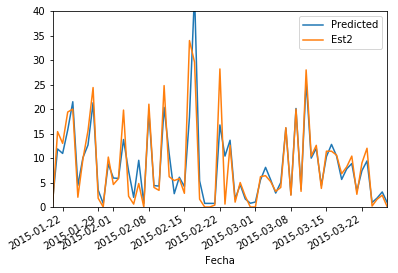

In [11]:
plot(TodasEstaciones.loc['2015-01-20':'2015-03-27'].index,y_pred,label='Predicted')
TodasEstaciones['Est2'].loc['2015-01-20':'2015-03-27'].plot()
figsize(12,8)
ylim(0,40)
legend(loc='best')

# Predict the missing data in between 2014-11-23:2015-01-11¶

In [ ]:
#Get the prediction for the train set
X_missing = TodasEstaciones.loc['2014-11-23':'2015-01-11',['Est1','Est3','week']].astype(float32).values

In [ ]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_missing)

# Scale the train set
X_missing = scaler.transform(X_missing)

In [ ]:
y_missing = model.predict(X_missing)
y_missing = y_missing.reshape([50]).tolist()

In [ ]:
TodasEstaciones['Est2_Completed']=TodasEstaciones['Est2']
TodasEstaciones['Est2_Completed'].loc['2014-11-23':'2015-01-11']=y_missing

In [ ]:
TodasEstaciones.loc['2014-11-01':'2015-03-31',['Est1','Est2','Est2_Completed','Est3']].plot(subplots=True, 
                                                   figsize=(15, 10)); plt.legend(loc='best')
xticks(rotation='vertical')
ylim(0,50)